# Introduction to pandas
* The premier data science library
* Has two main objects : DataFrame, Series
* Is a wrapper around, among other libraries, NumPy and matplotlib
* Series is a vector of data with an index
* DataFrame is a collection of Series with a single index
* The name pandas derives from panel data 
* Was developed by a quant working for a hedge fund, long since retired by the age of about 27


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'1.4.1'

* create a folder named data in the same directory as your notebook 
* download Archive.zip into it
* extract the contents of Archive.zip (may take a minute or two)

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head(3)

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002


In [3]:
cast =pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [43]:
cast['decade'] = cast.year // 10 * 10


### basic operations
* df.head([optional value])
* df.tail([optional value])
* df['column name'] or df.column_name to subset by columns
* df[['col1, col2, col...']]
* df[column.isnull()]
* df[column.notnull()]
* df[column == some value] 
* df[(df.column > some value) & (df.column < some value)]
* df.sort_values(by=column, ascending=False) # for descending order
* df['column'].str.any_string_method
* df.index --> returns the index of df or subset
* df.sort_index()
* df.plot --> wrapper around matplotlib

In [4]:
len(cast)

3442902

In [42]:
titles['decade'] = titles.year // 10 * 10

In [6]:
titles.head()

,title,year,decade
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990


In [7]:
titles[titles.decade == 1950]

,title,year,decade
0,Ankara ekspresi,1952,1950
7,Duffy of San Quentin,1954,1950
32,Basahang ginto,1952,1950
47,Vendetta,1950,1950
54,The Pathfinder and the Mohican,1957,1950
...,...,...,...
225975,The Steel Trap,1952,1950
225977,Gunmen from Laredo,1959,1950
225981,Einmal keine Sorgen haben,1953,1950
225989,Buchanan Rides Alone,1958,1950


In [8]:
# you need to use & for compound pipe for or
titles[(titles.year>= 1950) & (titles.year < 1960) ]

,title,year,decade
0,Ankara ekspresi,1952,1950
7,Duffy of San Quentin,1954,1950
32,Basahang ginto,1952,1950
47,Vendetta,1950,1950
54,The Pathfinder and the Mohican,1957,1950
...,...,...,...
225975,The Steel Trap,1952,1950
225977,Gunmen from Laredo,1959,1950
225981,Einmal keine Sorgen haben,1953,1950
225989,Buchanan Rides Alone,1958,1950


In [10]:
titles[titles.title.str.contains('Wizard of Oz')]

,title,year,decade
48536,The Wizard of Oz,1939,1930
51651,The True Story of the Wonderful Wizard of Oz,2011,2010
98191,The Wizard of Oz,1925,1920


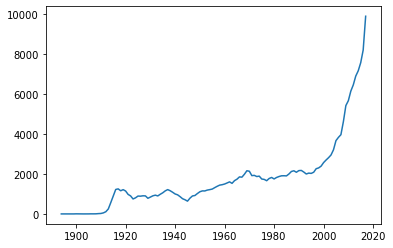

In [24]:
titles.year[titles['year'] < 2018].value_counts().sort_index().plot();

# Problems

### 1. How many movies are in the titles dataframe

In [11]:
len(titles)

226013

### 2. How many movies have the title North by Northwest

In [12]:
titles[titles.title == 'North by Northwest']

,title,year,decade
201761,North by Northwest,1959,1950


### 3. How many version of Hamlet are there, when was the first made? the last?

In [24]:
titles.title[titles.title.str.contains("Hamlet")].count()

55

### 4. List all the movies called Treasure Island from oldest to newest

In [31]:
titles[titles.title == "Treasure Island"].sort_values(by="year")

,title,year,decade
180911,Treasure Island,1918,1910
108853,Treasure Island,1920,1920
87953,Treasure Island,1934,1930
126321,Treasure Island,1950,1950
190233,Treasure Island,1972,1970
122150,Treasure Island,1973,1970
52099,Treasure Island,1985,1980
36752,Treasure Island,1999,1990


### 5. How many movies were made in 1950? 1980? 2000?

In [36]:
titles[titles.year == 2010]

,title,year,decade
9,Luang phii theng III,2010,2010
15,Vita e Morte di Giovanni dalle Bande Nere,2010,2010
29,Escape from New Jersey,2010,2010
61,Dalla vita in poi,2010,2010
69,Twelve,2010,2010
...,...,...,...
225681,Letters to God,2010,2010
225785,...And Once Again,2010,2010
225925,Het geheim van de Vughtse Heide,2010,2010
225969,Much Ado About Nothing,2010,2010


### 6. How many movies were made between 1950 and 1959? 1980 - 1989? 2000 - 2009

### 7. How big was the cast of Metropolis

In [40]:
cast[cast.title == "Metropolis"].count()

title        33
year         33
name         33
type         33
character    33
n             9
dtype: int64

### 8. How many roles for actors were there 1950's? 1990's

In [48]:
len(cast[(cast.decade == 1930)  & (cast.type == 'actor')])

149272

### 9. How many roles for actors & actresses over time?

In [75]:
cast[cast.year< 2018].groupby(['year','type']).size().unstack()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
...,...,...
2013,79780.0,42964.0
2014,82876.0,46177.0
2015,83390.0,47947.0


<AxesSubplot:xlabel='year'>

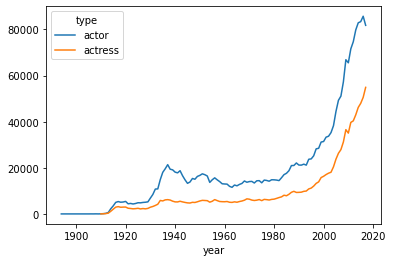

In [77]:
cast[cast.year< 2018].groupby(['year','type']).size().unstack().plot()

### 10. How many "leading roles" were there in the 2000's?

In [49]:
len(cast[cast.n == 1])

140864

### 11. How many roles received no ranking in the 2000's? 1950's

In [50]:
len(cast[(cast.decade == 2000) & (cast.n.isnull())])

232037

### 12. Plot the number of films made in each decade

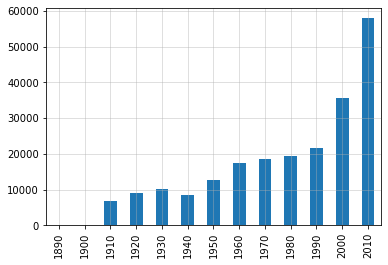

In [78]:
titles[titles['year'] < 2018].decade.value_counts().sort_index().plot(kind='bar')
plt.grid(axis= 'both', alpha=.5)

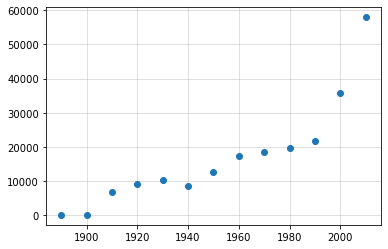

In [79]:
titles[titles['year'] < 2018].decade.value_counts().sort_index().plot(style = 'o')
plt.grid(axis= 'both', alpha=.5)

### 13. Plot the number of films with a Rustler character over time

<AxesSubplot:>

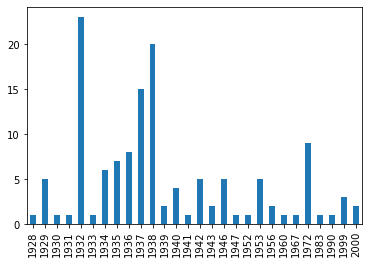

In [83]:
cast.year[cast.character == 'Rustler'].value_counts().sort_index().plot(kind='bar')

### 14. What are the top ten character names of all time?

In [84]:
cast.character.value_counts()[:10]

Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: character, dtype: int64

### 15. Which actor appeared in the most films in the 1990's decade?

In [93]:
cast.name[cast.decade == 1990].value_counts()[:1]

Shakti Kapoor    143
Name: name, dtype: int64

### 16. What are the top 10 roles that start with Science?

In [95]:
cast.character[cast.character.str.startswith('Scien')].value_counts()[:10]

Scientist               459
Science Teacher          57
Scientist #1             27
Scientist #2             25
Scientist 1              10
Scientist #3             10
Science Fair Student      9
Scientific Delegate       9
Scientist 2               7
Science Student           6
Name: character, dtype: int64